In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
datos = pd.read_csv('/content/datos_tratados.csv')
datos

,id_cliente,tasa_abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefono,lineas_adicionales,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_sin_papel,metodo_pago,facturacion_mensual,facturacion_total,facturacion_diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1.0,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0.0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [90]:
datos.describe()

,tasa_abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefono,facturacion_sin_papel,facturacion_mensual,facturacion_total,facturacion_diaria
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [91]:
datos.dtypes

,0
id_cliente,object
tasa_abandono,float64
genero,object
adulto_mayor,int64
tiene_pareja,int64
tiene_dependientes,int64
meses_contrato,int64
servicio_telefono,int64
lineas_adicionales,object
servicio_internet,object


## Preparación de los Datos

In [92]:
# Eliminar ID
datos = datos.drop(columns=["id_cliente"])

In [93]:
# Detectar columnas categóricas
cat_cols = datos.select_dtypes(include=["object"]).columns.tolist()

In [94]:
# Crear transformador One-Hot
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"  # deja columnas numéricas sin cambios
)

# Aplicar transformación
X_encoded = preprocessor.fit_transform(datos)

# Obtener nombres de columnas finales
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
num_features = datos.select_dtypes(exclude=["object"]).columns.tolist()
all_features = list(num_features) + list(cat_features)

# Convertir a DataFrame
datos_codificados = pd.DataFrame(X_encoded, columns=all_features, index=datos.index)

# Mostrar primeras filas del dataset transformado
print("\n=== Dataset transformado a numérico (One-Hot Encoding) ===")
print(datos_codificados.head())



=== Dataset transformado a numérico (One-Hot Encoding) ===
   tasa_abandono  adulto_mayor  tiene_pareja  tiene_dependientes  \
0            0.0           0.0           0.0                 0.0   
1            1.0           0.0           1.0                 0.0   
2            1.0           0.0           0.0                 1.0   
3            1.0           0.0           0.0                 1.0   
4            0.0           0.0           0.0                 1.0   

   meses_contrato  servicio_telefono  facturacion_sin_papel  \
0             0.0                0.0                    0.0   
1             0.0                0.0                    0.0   
2             0.0                0.0                    0.0   
3             0.0                0.0                    0.0   
4             0.0                0.0                    0.0   

   facturacion_mensual  facturacion_total  facturacion_diaria  ...  \
0                  0.0                1.0                 0.0  ...   
1           

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

print("Tamaño X_train_bal:", X_train_bal.shape)
print("Tamaño y_train_bal:", y_train_bal.shape)

Tamaño X_train_bal: (7244, 31)
Tamaño y_train_bal: (7244,)


In [96]:
# Contar cuántos clientes cancelaron y cuántos permanecieron
proporcion = datos['tasa_abandono'].value_counts(normalize=True)

print("Proporción de clientes por clase:")
print(proporcion)

Proporción de clientes por clase:
tasa_abandono
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


In [97]:
print("\nEn porcentaje:")
print(proporcion * 100)


En porcentaje:
tasa_abandono
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [98]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [99]:
print(datos["tasa_abandono"].isnull().sum())

224


In [100]:
datos = datos.dropna(subset=["tasa_abandono"])
y = datos["tasa_abandono"].astype(int)
X = datos.drop(columns=["tasa_abandono"])

print("Filas después de eliminar NaN:", datos.shape[0])

Filas después de eliminar NaN: 7043


In [101]:
# Separar features y target
X = datos.drop(columns=["tasa_abandono"])
y = datos["tasa_abandono"].astype(int)

# Dividir en train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)


Shape X_train: (4930, 20)
Shape X_test: (2113, 20)


##  Correlación y Selección de Variables

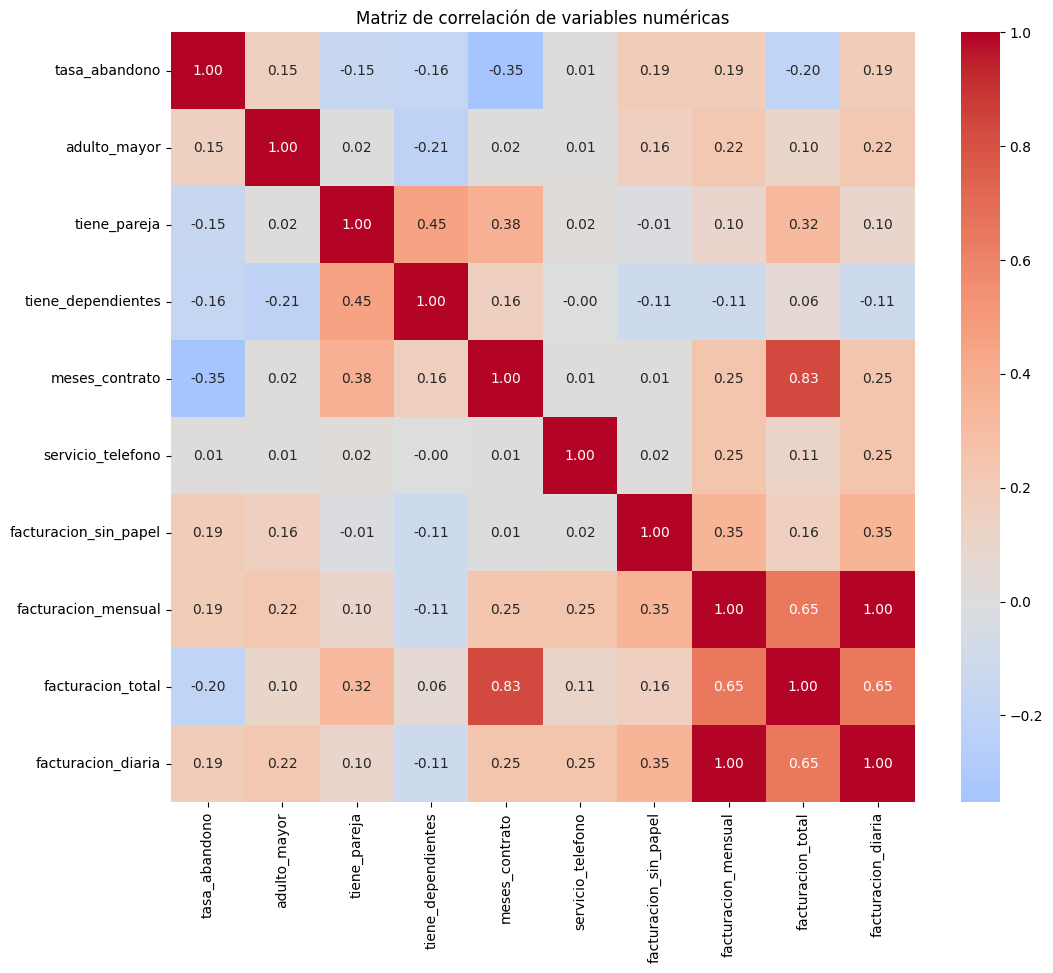

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
num_cols = datos.select_dtypes(include=["number"]).columns.tolist()

# Calcular matriz de correlación
corr_matrix = datos[num_cols].corr()

# Visualizar con un mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

### Boxplot: Tiempo de contrato vs Cancelación

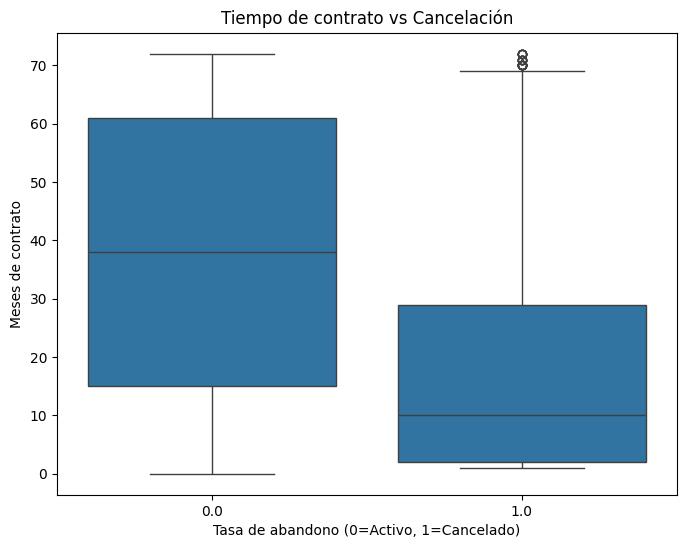

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(x="tasa_abandono", y="meses_contrato", data=datos)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Tasa de abandono (0=Activo, 1=Cancelado)")
plt.ylabel("Meses de contrato")
plt.show()


1. Usuarios que continúan con el servicio (0)

    Valor central: alrededor de 40 meses → La mitad de los clientes activos han estado contratados por más de 40 meses.

    Distribución intermedia (IQR): entre 20 y 60 meses → Gran parte lleva entre 1 año y 5 años con el servicio.

    Valores máximos y mínimos: desde 0 hasta 70 meses → Algunos clientes han permanecido por más de 6 años.

2. Usuarios que se dieron de baja (1)

    Valor central: alrededor de 10 meses → La baja sucede principalmente en etapas tempranas del contrato.

    IQR: entre 5 y 25 meses → Gran parte cancela entre medio año y dos años.

    Casos atípicos: algunos casos superan los 50 meses antes de cancelar → Posiblemente por cambios en necesidades o condiciones del servicio.

## Separación de Datos

In [104]:
# Separar features y target
X = datos.drop(columns=["tasa_abandono"])
y = datos["tasa_abandono"].astype(int)  # Asegúrate de que no haya NaN

# Dividir en entrenamiento y prueba (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Revisar tamaños
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (4930, 20)
Tamaño prueba: (2113, 20)


In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Columnas categóricas y numéricas
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

# One-Hot Encoder para las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Transformar X_train y X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Convertir a DataFrame
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_cols) + list(cat_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_features, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_features, index=X_test.index)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

print("X_train_bal shape:", X_train_bal.shape)
print("y_train_bal shape:", y_train_bal.shape)


X_train_bal shape: (7244, 31)
y_train_bal shape: (7244,)


## Creación de Modelos

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# --- Cargar datos ---
datos = pd.read_csv('/content/datos_tratados.csv')

# Eliminar filas con NaN en target
datos = datos.dropna(subset=['tasa_abandono'])

# Separar features y target
X = datos.drop(columns=['tasa_abandono', 'id_cliente'], errors='ignore')
y = datos['tasa_abandono'].astype(int)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Detectar columnas categóricas y numéricas
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

# --- One-Hot Encoding ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Transformar conjuntos
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Obtener nombres de columnas finales
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_cols) + list(cat_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_features, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_features, index=X_test.index)

# --- Balanceo con SMOTE ---
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

# --- Modelo 1: Logistic Regression (normalizado) ---
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
pipeline_lr.fit(X_train_bal, y_train_bal)
y_pred_lr = pipeline_lr.predict(X_test_encoded)
y_prob_lr = pipeline_lr.predict_proba(X_test_encoded)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (sin normalización) ---
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline_rf.fit(X_train_bal, y_train_bal)
y_pred_rf = pipeline_rf.predict(X_test_encoded)
y_prob_rf = pipeline_rf.predict_proba(X_test_encoded)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

ROC-AUC: 0.8404772405682048
Matriz de confusión:
 [[1126  426]
 [ 112  449]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

ROC-AUC: 0.8192442159619236
Matriz de confusión:
 [[1358  194]
 [ 273  288]]


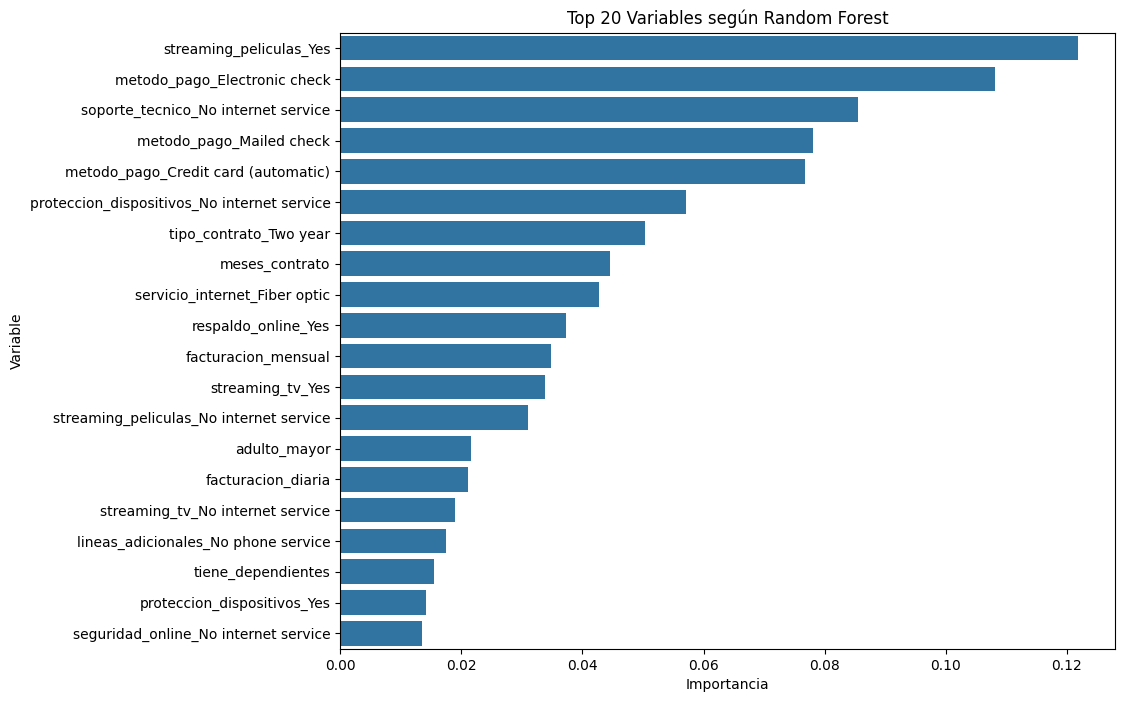

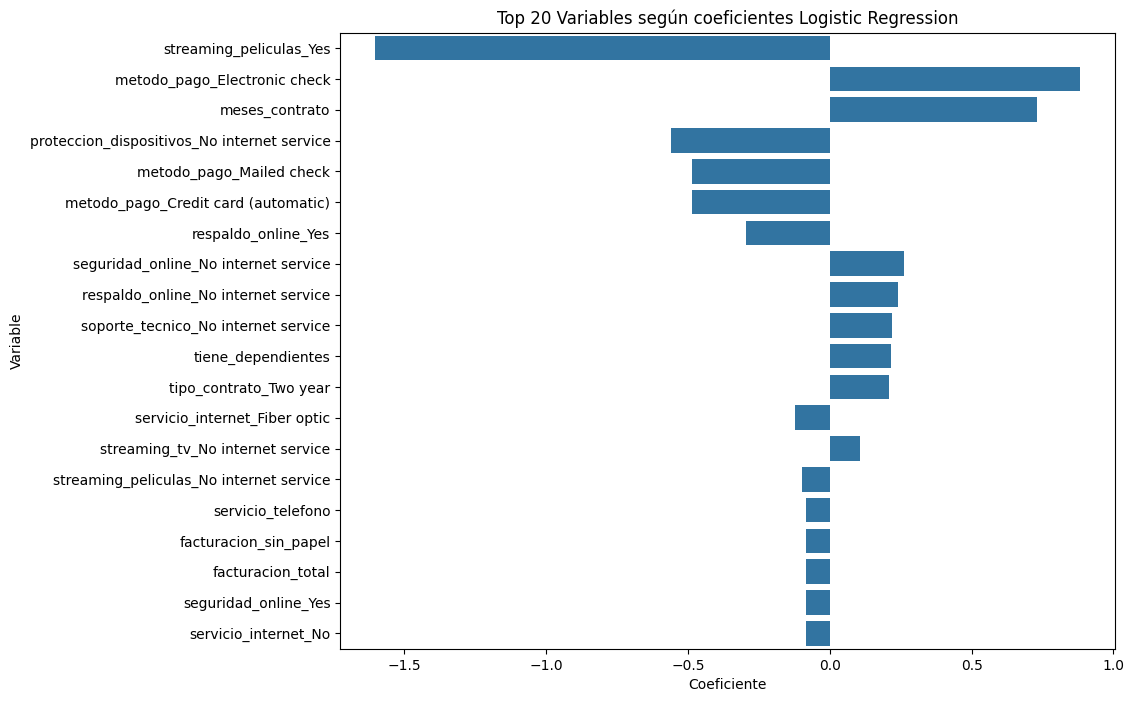

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Random Forest: importancia de variables ---
rf_model = pipeline_rf.named_steps['classifier']
importances = rf_model.feature_importances_
features = X_train_encoded.columns

rf_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=rf_importance[:20], y=rf_importance[:20].index)
plt.title("Top 20 Variables según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# --- Logistic Regression: coeficientes ---
lr_model = pipeline_lr.named_steps['classifier']
coef = lr_model.coef_[0]
lr_coef = pd.Series(coef, index=X_train_encoded.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=lr_coef[:20], y=lr_coef[:20].index)
plt.title("Top 20 Variables según coeficientes Logistic Regression")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()


## Evaluación de métricas de los modelos de cancelación

### Logistic Regression

Exactitud (Accuracy): 75% → El modelo acierta en 3 de cada 4 predicciones.

Precisión (Precision) para clientes que cancelan: 51% → De todos los clientes que el modelo predijo como “en riesgo de cancelar”, solo la mitad realmente cancela.

Recall para clientes que cancelan: 80% → Detecta correctamente 8 de cada 10 clientes que realmente cancelan.

F1-score: 63% → Buen equilibrio entre precisión y recall para clientes en riesgo.

ROC-AUC: 0.84 → Buen poder del modelo para diferenciar entre clientes que cancelan y los que permanecen.

Interpretación: Este modelo es muy útil para prevenir cancelaciones, porque identifica la mayoría de los clientes que están en riesgo, aunque genera algunos falsos positivos.

### Random Forest

Exactitud (Accuracy): 78% → Un poco más alto que Logistic Regression, acierta casi 8 de cada 10 predicciones.

Precisión para clientes que cancelan: 60% → Predice mejor quién realmente cancelará, reduciendo falsos positivos.

Recall para clientes que cancelan: 51% → Solo detecta la mitad de los clientes que realmente cancelan.

F1-score: 55% → Menos equilibrado para clientes en riesgo.

ROC-AUC: 0.82 → Buen poder de discriminación, pero ligeramente inferior a Logistic Regression.

Interpretación: Este modelo es más conservador, predice con mayor certeza quién cancelará, pero pierde a muchos clientes en riesgo.

## Análisis de la Importancia de las Variables

In [110]:
# Obtener coeficientes
coef = pipeline_lr.named_steps['classifier'].coef_[0]
features = X_train_encoded.columns
lr_coef = pd.Series(coef, index=features).sort_values(key=abs, ascending=False)

# Mostrar top 10 variables más influyentes
print(lr_coef.head(10))


streaming_peliculas_Yes                       -1.601369
metodo_pago_Electronic check                   0.881741
meses_contrato                                 0.729503
proteccion_dispositivos_No internet service   -0.560633
metodo_pago_Mailed check                      -0.484074
metodo_pago_Credit card (automatic)           -0.484074
respaldo_online_Yes                           -0.296793
seguridad_online_No internet service           0.262474
respaldo_online_No internet service            0.240362
soporte_tecnico_No internet service            0.219215
dtype: float64


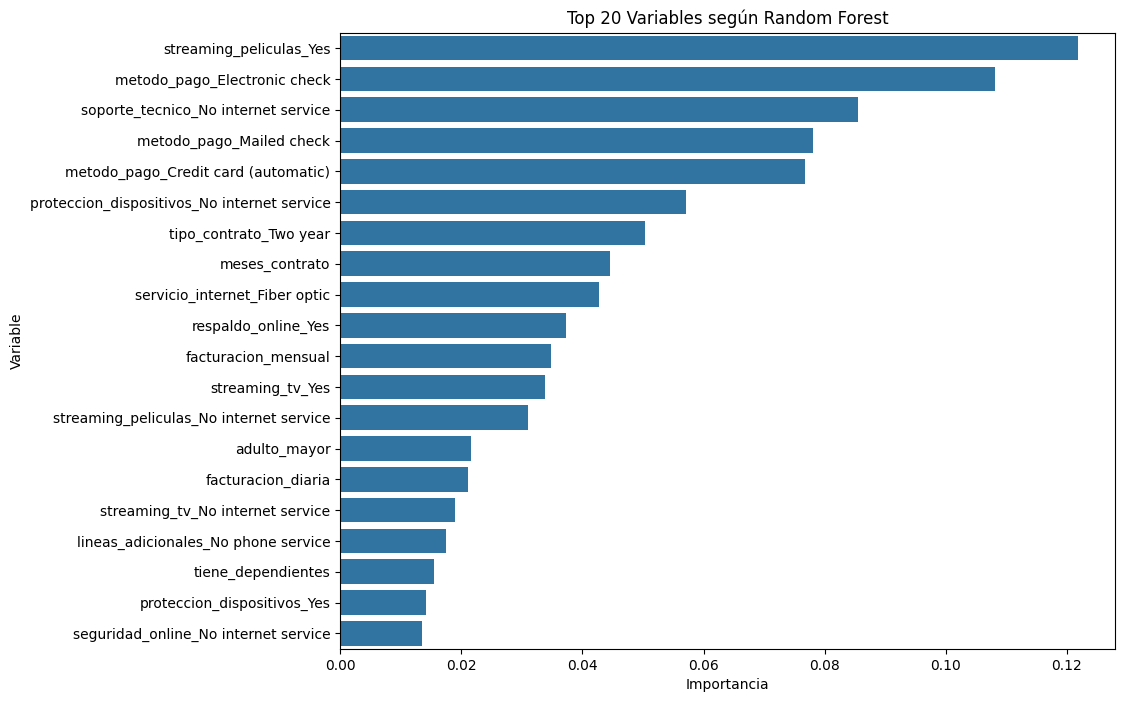

In [111]:
rf_model = pipeline_rf.named_steps['classifier']
importances = rf_model.feature_importances_
features = X_train_encoded.columns

rf_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Gráfico top 20 variables
plt.figure(figsize=(10,8))
sns.barplot(x=rf_importance[:20], y=rf_importance[:20].index)
plt.title("Top 20 Variables según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Logistic Regression ---
lr_model = pipeline_lr.named_steps['classifier']
lr_coef = pd.Series(lr_model.coef_[0], index=X_train_encoded.columns)
lr_coef_abs = lr_coef.abs().sort_values(ascending=False)  # por magnitud

# --- Random Forest ---
rf_model = pipeline_rf.named_steps['classifier']
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
rf_importance_sorted = rf_importance.sort_values(ascending=False)

# --- Combinar ambos rankings ---
combined = pd.DataFrame({
    'LogisticRegression': lr_coef_abs,
    'RandomForest': rf_importance
})

# Normalizar para compararlos en la misma escala
combined_norm = combined / combined.max()

# Calcular promedio de importancia
combined_norm['Promedio'] = combined_norm.mean(axis=1)

# Top 10 variables más relevantes
top10_vars = combined_norm.sort_values('Promedio', ascending=False).head(10)
print("\n=== Top 10 Variables más relevantes para la cancelación ===")
print(top10_vars)




=== Top 10 Variables más relevantes para la cancelación ===
                                             LogisticRegression  RandomForest  \
streaming_peliculas_Yes                                1.000000      1.000000   
metodo_pago_Electronic check                           0.550617      0.887598   
metodo_pago_Mailed check                               0.302288      0.639973   
metodo_pago_Credit card (automatic)                    0.302288      0.630042   
soporte_tecnico_No internet service                    0.136892      0.702014   
meses_contrato                                         0.455549      0.366152   
proteccion_dispositivos_No internet service            0.350096      0.468273   
tipo_contrato_Two year                                 0.129629      0.413621   
respaldo_online_Yes                                    0.185337      0.306466   
servicio_internet_Fiber optic                          0.075468      0.351228   

                                             Pr

Los factores que más influyen en que un cliente cancele su servicio son la forma de pago y los servicios adicionales que tiene contratados. Además, el tiempo de contrato sigue siendo clave: los clientes que llevan poco tiempo con la empresa son los que tienen mayor riesgo de irse.

Por ello, la empresa debería enfocarse en retener a los clientes más recientes y aquellos que usan métodos de pago electrónicos, ofreciéndoles beneficios claros y atractivos en servicios como streaming de películas y protección de dispositivos, para aumentar su satisfacción y fidelidad.

# Interpretación y Conclusiones

## Informe Telecom X
1. Objetivo

El objetivo de este análisis fue identificar qué clientes tienen más riesgo de cancelar sus servicios y entender cuáles son los factores que más influyen en esa decisión. Con esta información, la empresa puede tomar acciones para retener a los clientes y reducir el abandono.

2. Cómo se realizó el análisis

Se trabajó con información de más de 7.000 clientes.

Se prepararon los datos: se eliminaron los valores faltantes y se transformaron las variables categóricas (como género, tipo de contrato o método de pago) a un formato que los modelos de predicción puedan usar.

Se probaron dos modelos de predicción:

Regresión Logística: detecta muy bien a los clientes que podrían cancelar.

Random Forest: ofrece una predicción más general, con buen desempeño global.

Se evaluaron ambos modelos usando métricas como exactitud, precisión, recall y ROC-AUC.

3. Qué nos dicen los modelos

La Regresión Logística es mejor para identificar a los clientes que realmente podrían cancelar.

Random Forest acierta más en general, pero no detecta tan bien a los clientes en riesgo de cancelación.

4. Factores que más influyen en la cancelación

Estos son los elementos que más impactan en que un cliente decida cancelar:

Servicio de streaming de películas: tener este servicio no garantiza fidelidad.

Métodos de pago electrónicos: los clientes que usan cheques electrónicos o pagos automáticos tienen más riesgo de irse.

Soporte técnico limitado: los clientes sin soporte adecuado para internet tienden a cancelar más.

Tiempo de contrato: los que llevan poco tiempo son los que más cancelan.

Protección de dispositivos: su ausencia aumenta el riesgo de abandono.

Tipo de contrato: los contratos de dos años tienen un impacto moderado.

Respaldo en la nube: influye, pero en menor medida.

Servicio de internet (Fibra óptica): es relevante, aunque no determinante.

5. Estrategias recomendadas

Cuidar a los clientes nuevos o con contratos cortos, ofreciéndoles incentivos para quedarse.

Promover métodos de pago automáticos confiables, con beneficios claros.

Destacar y mejorar los servicios adicionales, como streaming y protección de dispositivos.

Asegurar soporte técnico eficiente, evitando que los clientes se frustren y se vayan.

6. Conclusión

Los clientes suelen cancelar por la combinación de su forma de pago, los servicios contratados y el tiempo que llevan con la empresa. Si Telecom X enfoca sus esfuerzos en estos factores, puede retener mejor a los clientes y reducir la tasa de abandono, asegurando una base más estable y satisfecha.